In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import pickle

data = pd.read_csv('/content/drive/MyDrive/Infant_crying_finetuning/data/audio_signals.csv')

print(data.shape)
print(data['Class'].value_counts())
data.head()

(794, 41)
Class
hunger      161
deaf        141
pain        128
asphyxia    106
normal      103
not_cry      96
others       59
Name: count, dtype: int64


,Class,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40
0,asphyxia,-509.43875,133.50290,-14.670622,45.425710,10.361301,16.062809,22.289886,-6.661918,18.790670,...,3.013521,3.989930,0.621700,4.263285,2.670231,0.197611,3.798702,-1.625334,0.667355,3.314880
1,asphyxia,-429.10336,130.33963,-22.146925,31.498243,2.992562,14.319461,25.021437,-4.479764,19.260838,...,-1.315864,3.520047,0.016293,1.189975,0.621417,-0.862812,2.462370,-0.927585,0.978588,2.913311
2,asphyxia,-512.80920,144.38297,-45.292587,51.233273,3.728040,15.480604,33.057243,-8.960519,23.915836,...,-1.038806,4.825384,0.414363,3.427109,2.011868,-0.087840,5.162412,-0.544941,1.657766,2.743548
3,asphyxia,-478.68103,158.52989,-25.152557,31.757399,1.858092,18.689701,27.509400,-11.126746,16.821674,...,2.250744,7.583653,1.051453,2.445950,3.106311,0.293718,3.410690,0.698355,2.951213,1.856254
4,asphyxia,-450.50305,154.58798,-40.745937,30.536585,3.520589,12.321450,24.066553,-8.209265,20.781223,...,2.394281,7.252883,4.054532,6.375284,4.240281,0.236346,3.369999,-1.069593,-0.739927,-0.965160


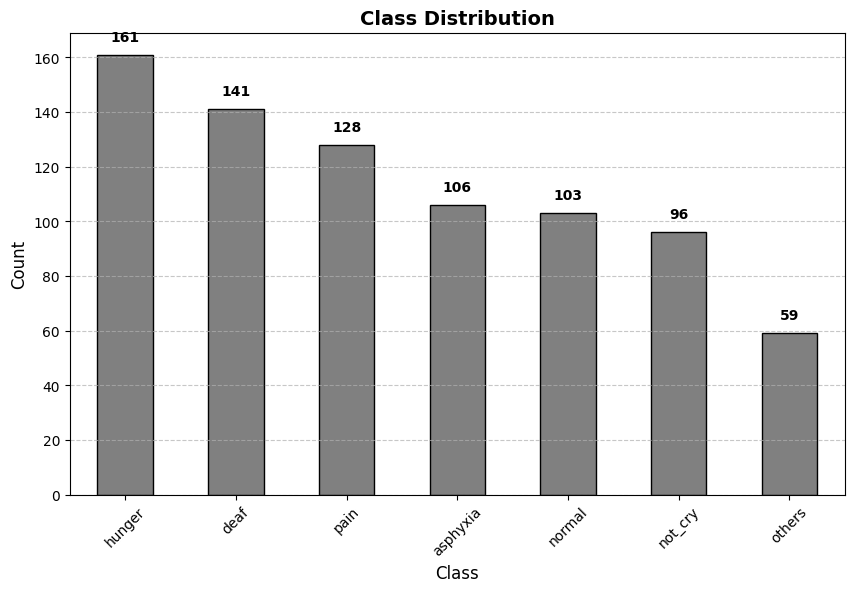

In [4]:
import matplotlib.pyplot as plt

# 클래스별 데이터 개수 계산
class_counts = data['Class'].value_counts()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
class_counts.plot(kind='bar', color='gray', edgecolor='black')

# 제목 및 라벨 추가
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# 격자 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 값 표시
for i, v in enumerate(class_counts):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10, fontweight='bold')

# 그래프 출력
plt.show()


In [5]:
data_tf  = data.copy()

# Pain 클래스 선택
pain_df = data_tf[data_tf['Class'] == 'pain']

# Pain이 아닌 다른 클래스 선택 후 각 클래스별로 20개씩 샘플링
others_df = data_tf[data_tf['Class'] != 'pain'].groupby('Class').apply(lambda x: x.sample(n=20, random_state=42)).reset_index(drop=True)

# 두 데이터프레임 합치기
sampling_df = pd.concat([pain_df, others_df]).reset_index(drop=True)

print(sampling_df.shape)
print(sampling_df['Class'].value_counts())
sampling_df.tail()

(248, 41)
Class
pain        128
asphyxia     20
deaf         20
hunger       20
normal       20
not_cry      20
others       20
Name: count, dtype: int64


<ipython-input-5-7de0dcb492b3>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  others_df = data_tf[data_tf['Class'] != 'pain'].groupby('Class').apply(lambda x: x.sample(n=20, random_state=42)).reset_index(drop=True)


,Class,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40
243,others,-503.60470,190.89609,-79.743730,2.085766,19.614190,-46.61448,-0.447440,5.286076,-22.781464,...,-0.594638,-6.205363,1.660818,-0.977906,-4.313218,2.338441,-1.062114,-2.124262,2.517996,-1.581865
244,others,-373.48320,174.15509,-89.780660,13.069295,23.626516,-43.22698,16.783014,10.220210,-24.853380,...,0.758559,-5.789983,2.636466,-0.938441,-2.697018,5.175657,-0.542635,-1.317239,4.061011,-3.212187
245,others,-243.04222,147.07898,-74.544870,-11.935883,0.091410,-44.49613,1.685036,1.311653,-24.178076,...,3.913107,-2.879687,2.695657,1.354009,-1.533181,3.122184,-0.206711,-2.207568,0.981976,-1.708890
246,others,-329.40300,143.60612,-114.659454,-0.980587,14.824446,-61.85168,6.079243,19.370130,-29.968555,...,0.274828,-3.854651,0.169541,-1.512260,-0.957227,3.743259,-1.282305,-0.870361,3.453091,-1.049757
247,others,-446.43503,159.58403,-59.568386,12.324762,22.851336,-32.63935,5.112694,-1.029231,-28.321018,...,0.752823,-6.684784,-0.683357,-1.745179,-5.110731,0.259313,-2.578076,-3.875701,0.812591,-2.920989


In [6]:
X = sampling_df.drop('Class', axis=1)
y = sampling_df['Class']

# ✅ MFCC Feature만 추출 (X 자체를 사용)
mfcc_features = X.values  # (샘플 수, 40)

# ✅ ΔMFCC (1차 미분, 40개) 계산
delta_mfccs = librosa.feature.delta(mfcc_features, order=1)

# ✅ ΔΔMFCC (2차 미분, 40개) 계산
delta2_mfccs = librosa.feature.delta(mfcc_features, order=2)

# ✅ 40차원 Feature 생성 (MFCC + ΔMFCC + ΔΔMFCC)
features_40 = np.hstack((mfcc_features, delta_mfccs, delta2_mfccs))  # (샘플 수, 40)

# ✅ 새로운 DataFrame 생성
columns = [f'Feature_{i+1}' for i in range(40)] + \
          [f'Delta_Feature_{i+1}' for i in range(40)] + \
          [f'Delta2_Feature_{i+1}' for i in range(40)]

X_expanded_mfcc = pd.DataFrame(features_40, columns=columns)

# ✅ 변환된 데이터 확인
print(f"X_expanded_mfcc shape: {X_expanded_mfcc.shape}")  # (샘플 수, 40)
X_expanded_mfcc.head()

X_expanded_mfcc shape: (248, 120)


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Delta2_Feature_31,Delta2_Feature_32,Delta2_Feature_33,Delta2_Feature_34,Delta2_Feature_35,Delta2_Feature_36,Delta2_Feature_37,Delta2_Feature_38,Delta2_Feature_39,Delta2_Feature_40
0,21.968033,29.171362,-41.851616,-16.417145,-24.346167,-6.378837,-3.474334,14.603462,-1.693874,-9.105957,...,0.073981,0.205579,-0.122826,0.052322,0.134563,0.370246,0.370246,0.370246,0.370246,0.370246
1,21.968033,29.171362,-41.851616,-16.417145,-24.346167,-6.378837,-3.474334,14.603462,-1.693874,-9.105957,...,0.073981,0.205579,-0.122826,0.052322,0.134563,0.370246,0.370246,0.370246,0.370246,0.370246
2,39.906654,35.309654,-56.011460,-20.386920,-13.155333,11.405809,0.476849,4.864019,-5.120507,-5.601883,...,-0.038663,0.087767,-0.221679,-0.165564,-0.198294,0.134645,0.134645,0.134645,0.134645,0.134645
3,39.906654,35.309654,-56.011460,-20.386920,-13.155333,11.405809,0.476849,4.864019,-5.120507,-5.601883,...,-0.038663,0.087767,-0.221679,-0.165564,-0.198294,0.134645,0.134645,0.134645,0.134645,0.134645
4,37.351540,39.357346,-29.318111,-5.049622,-25.959698,-7.713159,-3.490418,7.247108,0.296928,-2.165625,...,0.181286,0.375791,0.149314,0.200622,-0.010286,0.125427,0.125427,0.125427,0.125427,0.125427


In [7]:
# ✅ 기존 Scaler 로드
with open('/content/drive/MyDrive/Infant_crying_finetuning/artifacts_drive/scaler_model.pkl', 'rb') as f:
    scaler = pickle.load(f)

# ✅ 기존 Scaler로 변환
# X = X.copy()
X_expanded_mfcc.iloc[:,:40] = scaler.transform(X_expanded_mfcc.iloc[:,0:40])  #


# ✅ 변환된 데이터 확인
print(f"X shape: {X_expanded_mfcc.shape}")  # (샘플 수, Feature 개수 + 1)

X_expanded_mfcc.head()

X shape: (248, 120)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Delta2_Feature_31,Delta2_Feature_32,Delta2_Feature_33,Delta2_Feature_34,Delta2_Feature_35,Delta2_Feature_36,Delta2_Feature_37,Delta2_Feature_38,Delta2_Feature_39,Delta2_Feature_40
0,2.308136,-2.372912,0.505783,-1.207059,-1.386854,0.590521,-0.691474,0.984510,0.123711,-0.972361,...,0.073981,0.205579,-0.122826,0.052322,0.134563,0.370246,0.370246,0.370246,0.370246,0.370246
1,2.308136,-2.372912,0.505783,-1.207059,-1.386854,0.590521,-0.691474,0.984510,0.123711,-0.972361,...,0.073981,0.205579,-0.122826,0.052322,0.134563,0.370246,0.370246,0.370246,0.370246,0.370246
2,2.437192,-2.240038,0.196921,-1.355698,-0.815446,1.283140,-0.459922,0.268288,-0.042318,-0.622548,...,-0.038663,0.087767,-0.221679,-0.165564,-0.198294,0.134645,0.134645,0.134645,0.134645,0.134645
3,2.437192,-2.240038,0.196921,-1.355698,-0.815446,1.283140,-0.459922,0.268288,-0.042318,-0.622548,...,-0.038663,0.087767,-0.221679,-0.165564,-0.198294,0.134645,0.134645,0.134645,0.134645,0.134645
4,2.418809,-2.152419,0.779170,-0.781430,-1.469241,0.538556,-0.692416,0.443536,0.220170,-0.279504,...,0.181286,0.375791,0.149314,0.200622,-0.010286,0.125427,0.125427,0.125427,0.125427,0.125427


In [8]:
from sklearn.preprocessing import LabelEncoder

# ✅ 기존 클래스 목록
print("Original Classes:", y.unique())

# ✅ "pain" vs "not pain"으로 변환
y_binary = y.apply(lambda x: 'pain' if x == 'pain' else 'not pain')

# ✅ Label Encoding (0: not pain, 1: pain)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_binary)

# ✅ 변환된 값 확인
print("Transformed Classes:", label_encoder.classes_)
print("Encoded Values (First 10 Samples):", y_encoded[:10])


Original Classes: ['pain' 'asphyxia' 'deaf' 'hunger' 'normal' 'not_cry' 'others']
Transformed Classes: ['not pain' 'pain']
Encoded Values (First 10 Samples): [1 1 1 1 1 1 1 1 1 1]


In [9]:
# ✅ Label Encoding 매핑 결과 확인
label_mapping = {index: class_name for index, class_name in enumerate(label_encoder.classes_)}

# ✅ 매핑 결과 출력
print("Label Encoding 매핑 결과:")
for key, value in label_mapping.items():
    print(f"{key} → {value}")

Label Encoding 매핑 결과:
0 → not pain
1 → pain


In [10]:
# X_expanded_mfcc
y_encoded_df = pd.DataFrame(y_encoded)
y_encoded_df = y_encoded_df.rename(columns={y_encoded_df.columns[0]: 'Class'})

y_encoded_df

,Class
0,1
1,1
2,1
3,1
4,1
...,...
243,0
244,0
245,0
246,0


In [11]:
final_data = pd.concat([y_encoded_df, X_expanded_mfcc], axis=1)
print(final_data.shape)
final_data.head()

(248, 121)


,Class,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Delta2_Feature_31,Delta2_Feature_32,Delta2_Feature_33,Delta2_Feature_34,Delta2_Feature_35,Delta2_Feature_36,Delta2_Feature_37,Delta2_Feature_38,Delta2_Feature_39,Delta2_Feature_40
0,1,2.308136,-2.372912,0.505783,-1.207059,-1.386854,0.590521,-0.691474,0.984510,0.123711,...,0.073981,0.205579,-0.122826,0.052322,0.134563,0.370246,0.370246,0.370246,0.370246,0.370246
1,1,2.308136,-2.372912,0.505783,-1.207059,-1.386854,0.590521,-0.691474,0.984510,0.123711,...,0.073981,0.205579,-0.122826,0.052322,0.134563,0.370246,0.370246,0.370246,0.370246,0.370246
2,1,2.437192,-2.240038,0.196921,-1.355698,-0.815446,1.283140,-0.459922,0.268288,-0.042318,...,-0.038663,0.087767,-0.221679,-0.165564,-0.198294,0.134645,0.134645,0.134645,0.134645,0.134645
3,1,2.437192,-2.240038,0.196921,-1.355698,-0.815446,1.283140,-0.459922,0.268288,-0.042318,...,-0.038663,0.087767,-0.221679,-0.165564,-0.198294,0.134645,0.134645,0.134645,0.134645,0.134645
4,1,2.418809,-2.152419,0.779170,-0.781430,-1.469241,0.538556,-0.692416,0.443536,0.220170,...,0.181286,0.375791,0.149314,0.200622,-0.010286,0.125427,0.125427,0.125427,0.125427,0.125427


In [12]:
final_data.to_csv('./first_model_model_input_data.csv')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [14]:
y_encoded[:5]

array([1, 1, 1, 1, 1])

In [15]:
from sklearn.model_selection import train_test_split

# 1차 분할: Train(80%) / Test(20%)
X_train, X_test, y_train, y_test = train_test_split(X_expanded_mfcc, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 2차 분할: Train(80%) → Train(70%) / Validation(10%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 출력 확인
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_valid shape: {y_valid.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (158, 120)
y_train shape: (158,)
X_valid shape: (40, 120)
y_valid shape: (40,)
X_test shape: (50, 120)
y_test shape: (50,)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

In [17]:
model = Sequential()

model.add(Dense(64, input_shape=(120,)))


model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation(LeakyReLU(alpha=0.2)))
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(Dropout(0.1))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,329 (106.75 KB)

 Trainable params: 26,881 (105.00 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Callbacks 설정 (ModelCheckpoint + EarlyStopping)
checkpointer = ModelCheckpoint(filepath='./first_model_sim1.keras', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# ✅ 학습 파라미터
num_epochs = 300
num_batch_size = 32

# ✅ 학습 시작 시간 기록
start = datetime.now()

# ✅ 모델 학습 (EarlyStopping 추가)
history = model.fit(
    X_train, y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpointer, early_stopping]
)

# ✅ 학습 시간 출력
duration = datetime.now() - start
print(f"The model training takes {duration}")

Epoch 1/300
1/5 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.9688 - loss: 0.1031
Epoch 1: val_loss improved from inf to 0.55755, saving model to ./first_model_sim1.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.9248 - loss: 0.1925 - val_accuracy: 0.7500 - val_loss: 0.5575
Epoch 2/300
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9375 - loss: 0.2138
Epoch 2: val_loss did not improve from 0.55755
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9429 - loss: 0.1921 - val_accuracy: 0.7250 - val_loss: 0.6821
Epoch 3/300
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9062 - loss: 0.2756
Epoch 3: val_loss did not improve from 0.55755
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9359 - loss: 0.2119 - val_accuracy: 0.7250 - val_loss: 0.6945
Epoch 4/300
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9375 - loss: 0.2221
Epoch 4: val_loss did not improve from 0.55755
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9317 - loss: 0.1837 - val_accuracy: 0.8

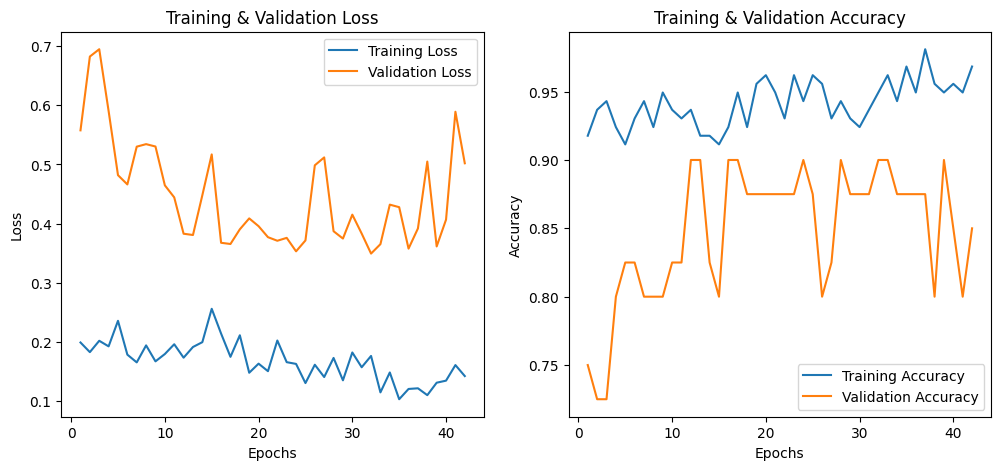

In [ ]:
import matplotlib.pyplot as plt

# ✅ 학습 과정에서 기록된 데이터 가져오기
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ✅ EarlyStopping이 적용된 경우, 실제 학습된 Epoch 범위 설정
epochs_range = range(1, len(train_loss) + 1)

# ✅ Loss 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# ✅ Accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# ✅ 그래프 표시
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# ✅ 예측값 변환
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_actual_classes =  (y_pred > 0.5).astype(int)

# ✅ Classification Report 출력 (Precision, Recall, F1-score, Accuracy 포함)
print(classification_report(y_actual_classes, y_pred_classes, digits=4))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step 
              precision    recall  f1-score   support

           0     0.5200    1.0000    0.6842        26
           1     0.0000    0.0000    0.0000        24

    accuracy                         0.5200        50
   macro avg     0.2600    0.5000    0.3421        50
weighted avg     0.2704    0.5200    0.3558        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step
Accuracy: 0.92
Confusion Matrix:
 [[23  1]
 [ 3 23]]
              precision    recall  f1-score   support

           0     0.8846    0.9583    0.9200        24
           1     0.9583    0.8846    0.9200        26

    accuracy                         0.9200        50
   macro avg     0.9215    0.9215    0.9200        50
weighted avg     0.9229    0.9200    0.9200        50



<Axes: >

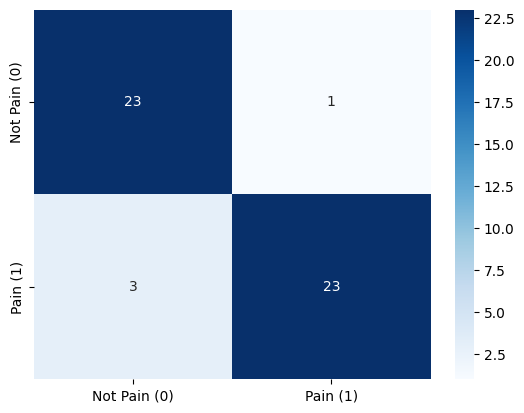

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # 0.5 이상이면 1, 아니면 0
y_actual_classes = y_test.astype(int)  # y_test가 이미 0/1이면 변환 불필요

# ✅ 정확도 계산
accuracy = accuracy_score(y_actual_classes, y_pred_classes)
print("Accuracy:", accuracy)

# ✅ 혼동 행렬(Confusion Matrix) 계산 및 출력
conf_matrix = confusion_matrix(y_actual_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

print(classification_report(y_actual_classes, y_pred_classes, digits=4))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Pain (0)", "Pain (1)"],
            yticklabels=["Not Pain (0)", "Pain (1)"])




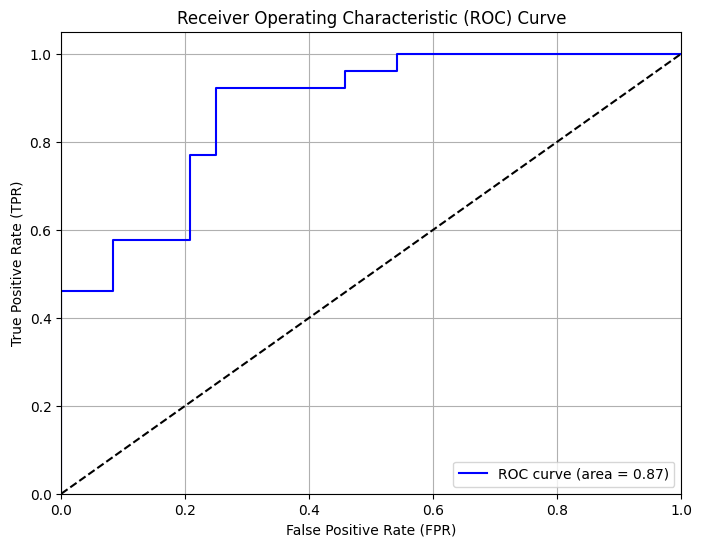

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ✅ ROC 곡선 데이터 계산
fpr, tpr, _ = roc_curve(y_test, y_pred)  # 실제 값과 예측 확률을 사용
roc_auc = auc(fpr, tpr)  # AUC 계산

# ✅ ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선(랜덤 분류 기준선)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()
